<center>
  <h2><b></b></h2>
</center>

<center>
  <h1><b> Đại học Bách Khoa - Thành Phố Hồ Chí Minh</b></h2>
</center>

<center>
  <h2><b>Cơ Sở Toán Cho Khoa Học Máy Tính – CO5097</b></h2>
</center>

<center>
  <h3><b>Chủ đề: Thuật toán tối ưu AdaGrad</b></h3>
</center>

<center>
  <h4><b>Giảng viên: TS. Nguyễn An Khương</b></h4>
</center>

<center>
  <b>
    Group 1:<br>
    Nguyễn Hoàng Long – 2570247<br>
    Lê Minh Quân – 2570307<br>
    Nguyễn Thành Đạt – 2111018<br>
    Lê Minh Huy – 2570411
  </b>
</center>

<center>
    TP. Hồ Chí Minh, Tháng 12 Năm 2025
</center>

# **1. Mô tả vấn đề**
Xét các bài toán với đặc trưng thưa, tức là các đặc trưng hiếm khi xuất hiện hoặc có nhiều giá trị không trong cơ sở dữ liệu. Điều này rất phổ biến trong việc xử lí ngôn ngữ tự nhiên, ví dụ như từ "bamboozle" xuất hiện ít hơn nhiều so với từ "trick" dù chúng đều mang cùng một nghĩa.

Do sự xuất hiện ít ỏi của các đặc trưng này, các tham số liên quan đến chúng chỉ cập nhật rất ít lần trong suốt quá trình huấn luyện. Đối với việc áp dụng một tốc độ đọc giảm dần cho toàn bộ tham số, điều này có thể dẫn đến việc các tham số của các đặc trưng phổ biến nhanh hội tụ đến giá trị tối ưu, giảm hẳn tốc độ học trong khi các tham số của các đặc trưng hiếm với số lượng dữ liệu không nhiều lại chưa xác định được giá trị tối ưu. Hay nói cách khác, tốc độ học với đặc trưng hiếm lại quá chậm, trong khi với đặc trưng thường gặp lại quá nhanh.

Một cách đơn giản để khắc phục điều này là đếm số lần xuất hiện của một đặc trưng và dùng để điều chỉnh tốc độ học cho từng đặc trưng thay vì một tốc độ học cho toàn bộ tham số. Tức là thay vì sử dụng một công thức cho toàn bộ đặc trưng $\eta = \frac{\eta_0}{\sqrt{t + c}}$ như trong thuật toán Stochastic Gradient Descent, ta chọn từng tốc độ học ứng với từng đặc trưng $\eta_i = \frac{\eta_0}{\sqrt{s(i, t) + c}}$. Trong đó, $s(i, t)$ là số giá trị khác không (số lần xuất hiện) của đặc trưng $i$ mà quan sát được đến thời điểm $t$. Cách này không tốn nhiều công sức hiện thực và tính toán. Tuy nhiên, khi gặp trường hợp các đặc trưng không hẳn là thưa, mà chỉ có thay đổi nhỏ - gradient nhỏ và hiếm khi đạt giá trị lớn. Ngay việc phân định rõ ràng rằng một thay đổi trong giá trị(gradient) phải lớn như thế nào mới được coi là một quan sát cũng đã gây khó khăn trong việc xây dựng, đánh giá việc huấn luyện.

Adagrad được đề xuất để giải quyết vấn đề này bằng cách thay đổi bộ đếm thô $s(i, t)$ bởi tổng bình phương tất cả các gradient được quan sát trước đó. Cụ thể là sử dụng công thức $s(i, t+1) = s(i, t) + \left(\partial_i f(\mathbf{x})\right)^2$ để điều chỉnh tốc độ. Việc làm này đem lại 2 lợi ích:
1. không cần phải quyết định gradient đủ lớn để xác định một lần xuất hiện,
2. tự động thay đổi tốc độc học tùy theo gradient. Các đặc trưng với gradient lớn (thay đổi lớn) sẽ bị giảm tốc độ học đi đáng kể, trong khi các đặc trưng thưa hoặc gradient nhỏ vẫn duy trì được phần nhiều tốc độ học.



# **2. Tiền điều kiện**
Các bài toán tối ưu lồi rất phù hợp để phân tích đặc tính của các thuật toán. Suy cho cùng, với đa số các bài toán không lồi ta khó có thể tìm được các chứng minh lý thuyết vững chắc. Tuy nhiên, trực giác và ý nghĩa hàm chứa suy ra từ các bài toán tối ưu lồi vẫn có thể được áp dụng. Xét bài toán cực tiểu hóa cho hàm mục tiêu bậc hai như sau:

$$ f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top \mathbf{Q} \mathbf{x} + \mathbf{c}^\top \mathbf{x} + b $$
với ma trận $\mathbf{Q}$ xác định dương (ma trận đối xứng với mọi trị riêng của nó đều dương). Điều này có nghĩa là hàm mục tiêu này có một giá trị cực tiểu $m = b - \frac{1}{2} \mathbf{c}^\top \mathbf{Q}^{-1} \mathbf{c}$ tại $\mathbf{x} = \mathbf{x}_* = - \mathbf{Q}^{-1} \mathbf{c}$. Do đó, theo tính chất của hàm số bậc hai, ta có:

$$ f(\mathbf{x}) = \frac{1}{2} (\mathbf{x} - \mathbf{x}_*)^\top \mathbf{Q} (\mathbf{x} - \mathbf{x}_*) + m. $$

Bởi vì $\mathbf{Q}$ là một ma trận xác định dương, do đó nó có thể được phân tích thành hệ riêng (eigendecomposition) thành $\mathbf{Q} = \mathbf{U}^\top \boldsymbol{\Lambda} \mathbf{U}$ với $\mathbf{U}$ là ma trận trực giao chứa các vector riêng của $\mathbf{Q}$ (do các vector riêng ứng với từng trị riêng khác nhau của ma trận đối xứng vuông góc nhau) và $\boldsymbol{\Lambda}$ là ma trận đường chéo với giá trị là trị riêng tương ứng của $\mathbf{Q}$. Thực hiện đổi biến từ $\mathbf{x}$ thành $\mathbf{z} \stackrel{\textrm{def}}{=} \mathbf{O} (\mathbf{x} - \mathbf{x}_* )$, ta được:

$$f(\mathbf{z}) = \frac{1}{2} \mathbf{z}^\top \boldsymbol{\Lambda} \mathbf{z} + m.$$

Vì $\mathbf{U}$ là một ma trận trực giao, do đó nó không làm nhiễu loạn nhiều việc tính toán gradient. Biểu diễn $\mathbf{z}$ dưới dạng gradient descend ta được:

$$\begin{align}
\mathbf{z}_t & = \mathbf{z}_{t-1} - \nabla_{\mathbf{z}_{t-1}} f(\mathbf{z}_{t-1}) = \mathbf{z}_{t-1} - \frac{1}{2}(\boldsymbol{\Lambda} + \boldsymbol{\Lambda}^⊤) \mathbf{z}_{t-1}
\\
& = \mathbf{z}_{t-1} - \boldsymbol{\Lambda} \mathbf{z}_{t-1} = (\mathbf{I} - \boldsymbol{\Lambda}) \mathbf{z}_{t-1}.
\end{align}$$

Phương trình này quan trọng vì nó cho thấy gradient descent không trộn lẫn các không gian riêng khác nhau. Nghĩa là, khi biểu diễn dưới dạng hệ riêng như thế này, việc tối ưu được thực hiện theo từng trục tọa độ (các tọa độ không trộn lẫn nhau). Do đó, ta có thể chọn $\bar{\mathbf{x}} = \mathbf{U} \mathbf{x}$ và tương tự $\bar{\mathbf{c}} = \mathbf{U} \mathbf{c}$, hàm mục tiêu ban đầu sẽ trở thành:

$$f(\mathbf{x}) = \bar{f}(\bar{\mathbf{x}}) = \frac{1}{2} \bar{\mathbf{x}}^\top \boldsymbol{\Lambda} \bar{\mathbf{x}} + \bar{\mathbf{c}}^\top \bar{\mathbf{x}} + b.$$

Hàm này đạt cực tiểu tại $m = b - \frac{1}{2} \bar{\mathbf{c}}^\top \mathbf{Q}^{-1} \bar{\mathbf{c}}$ với nghiệm là $\bar{\mathbf{x}}_0 = -\boldsymbol{\Lambda}^{-1} \bar{\mathbf{c}}$. Công thức này dễ tính toán hơn nhiều so với việc tính toán qua $\mathbf{Q}$ do $\boldsymbol{\Lambda}$ là ma trận chéo chứa các trị riêng của $\mathbf{Q}$.

Nếu ta làm nhiễu $\mathbf{c}$ một chút, ta sẽ mong rằng các nghiệm cực tiểu của $f$ cũng chỉ thay đổi không đáng kể. Tuy nhiên, điều đó lại không xảy ra. Mặc dù thay đổi $\mathbf{c}$ một chút dẫn đến $\bar{\mathbf{c}}$ cũng thay đổi một lượng tương ứng, các nghiệm cực tiểu của $f$ (cũng như $\bar{f}$) lại không như vậy. Mỗi khi các trị riêng $\boldsymbol{\Lambda}_i$ mang giá trị lớn, ta sẽ thấy $\bar{x}_i$ và cực tiểu của $f$ thay đổi khá nhỏ. Ngược lại, với $\boldsymbol{\Lambda}_i$ nhỏ, sự thay đổi $\bar{x}_i$ có thể là đáng kể. Tỉ lệ giữa trị riêng lớn nhất và nhỏ nhất được gọi là hệ số điều kiện (condition number) của bài toán tối ưu:

$$ \kappa = \frac{\boldsymbol{\Lambda}_1}{\boldsymbol{\Lambda}_d}. $$

Quá trình phân tích này mở ra một hướng mới cho bài toán, dù có phần hơi ngây thơi: chẳng phải ta có thể “sửa chữa” bài toán bằng cách biến đổi không gian sao cho tất cả các trị riêng đều có giá trị bằng 1. Điều này khá đơn giản trên lý thuyết: ta chỉ cần tính các trị riêng và các vector riêng của $\mathbf{Q}$ nhằm biến đổi bài toán từ $\mathbf{x}$ sang $\mathbf{z} := \boldsymbol{\Lambda}^{\frac{1}{2}} \mathbf{U} \mathbf{x}$. Trong hệ toạ độ mới, $\mathbf{x}^\top \mathbf{Q} \mathbf{x}$ có thể được đơn giản hóa thành $\|\mathbf{z}\|^2$. Do đó, ta có thể dễ dàng tìm được nghiệm của bài toán. Nhưng hướng giải quyết này không thực tế, bởi vì việc tính trị riêng và vector riêng cho $\mathbf{Q}$ thường tốn kém hơn rất nhiều so với việc giải bài toán.

Trong thực tế, ta không tính chính xác các trị riêng mà sẽ ước chừng, xấp xỉ bằng việc sử dụng các phần tử trên đường chéo của  $\mathbf{Q}$ và tái tỉ lệ chúng một cách tương ứng. Việc này có chi phí tính toán thấp hơn nhiều so với tính các trị riêng. Preconditioner theo cách này có dạng:

$$ \tilde{\mathbf{Q}} = \mathrm{diag}^{-\frac{1}{2}}(\mathbf{Q}) \mathbf{Q} \mathrm{diag}^{-\frac{1}{2}}(\mathbf{Q}). $$

Từ đây, có thể thấy $ \tilde{\mathbf{Q}}_{ij} = \mathbf{Q}_{ij} / \sqrt{\mathbf{Q}_{ii} \mathbf{Q}_{jj}} $ và $\tilde{\mathbf{Q}}_{ii} = 1$ với mọi $i$. Trong đa số các trường hợp, cách làm này sẽ đơn giản hóa đáng kể hệ số điều kiện. Nói cách khác, cách làm này giúp ta ước chừng trị riêng, vector riêng của $\mathbf{Q}$ mà không tốn quá nhiều chi phí.

Tuy nhiên, khi xét đến việc sử dụng ma trận Hessian để làm preconditioner như phương pháp Newton ($\mathbf{x} \leftarrow \mathbf{x} - \eta \textrm{diag}(\mathbf{H})^{-1} \nabla f(\mathbf{x})$) , ta lại có vấn đề khác: trong học sâu, ta thường không tính được ngay cả đạo hàm bậc hai của hàm mục tiêu.  Đối với $\mathbf{x} \in \mathbb{R}^d$, đạo hàm bậc hai thậm chí với một minibatch có thể yêu cầu không gian và độ phức tạp lên đến $\mathcal{O}(d^2)$ để tính toán, do đó khiến cho vấn đề không thể thực hiện được trong thực tế. Sự khéo léo của Adagrad nằm ở việc sử dụng một biến đại diện ước chừng để tính toán đường chéo của ma trận Hessian một cách hiệu quả và đơn giản—đó là độ lớn của chính gradient.

Để hiểu tại sao, hãy cùng xét lại $\bar{f}(\bar{\mathbf{x}})$. Ta có:

$$ \partial_{\bar{\mathbf{x}}} \bar{f}(\bar{\mathbf{x}}) = \frac{1}{2}(\boldsymbol{\Lambda} + \boldsymbol{\Lambda}^⊤) \bar{\mathbf{x}} + \bar{\mathbf{c}} = \boldsymbol{\Lambda} \bar{\mathbf{x}} + \bar{\mathbf{c}} = \boldsymbol{\Lambda} \left(\bar{\mathbf{x}} - \bar{\mathbf{x}}_0\right). $$

Trong đó, như đã định nghĩa, $\bar{\mathbf{x}}_0$ là nghiệm cực tiểu của phương trình. Do đó, độ lớn của gradient phụ thuộc vào cả $\boldsymbol{\Lambda}$ và khoảng cách đến điểm tối ưu. Nếu $\bar{\mathbf{x}} - \bar{\mathbf{x}}_0$ được giữ nguyên thì đây chính là tất cả các giá trị ta cần tính. Vì Adagrad là một thuật toán Stochastic Gradient Descent, do đó nó đảm bảo biểu thức trên không bằng 0 kể cả tại điểm tối ưu. Chính vì thế ta có thể yên tâm sử dụng phương sai của các gradient như một biến đại diện dễ tính cho độ lớn của ma trận Hessian.



# **3. Thuật toán**

Ta formal hoá lại phần thuật toán Adagrad. Sử dụng biến $\mathbf{s}_t$ để cộng dồn
bình phương các gradient trong quá khứ như sau (12.7.5):

$$
\mathbf{g}_t = \nabla_{\mathbf{w}}\, l\!\left(y_t,\; f(\mathbf{x}_t,\mathbf{w})\right)
$$

$$
\mathbf{s}_t = \mathbf{s}_{t-1} + \mathbf{g}_t^{\,2}
$$

$$
\mathbf{w}_t = \mathbf{w}_{t-1}
- \frac{\eta}{\sqrt{\mathbf{s}_t + \epsilon}}\;\mathbf{g}_t
$$

Ở đây tất cả phép toán đều được áp dụng theo từng toạ độ (coordinate-wise).

Nếu $\mathbf{v}$ là một vector thì:
- $\mathbf{v}^2$ là vector có phần tử thứ $i$ bằng $v_i^2$
- $\dfrac{1}{\sqrt{\mathbf{v}}}$ có phần tử thứ $i$ bằng $\dfrac{1}{\sqrt{v_i}}$
- tích theo toạ độ $\mathbf{u}\cdot\mathbf{v}$ có phần tử thứ $i$ bằng $u_i v_i$

Trong công thức cập nhật, $\eta$ là learning rate ban đầu (toàn cục)
và $\epsilon$ là một hằng số rất nhỏ dùng để tránh chia cho 0.
Ta khởi tạo $\mathbf{s}_0 = \mathbf{0}$.

# **4. Ví dụ và các bước tính toán**

**1. Nhóm em chọn một bài toán Linear regression đơn giản**

Lấy dữ liệu được sinh từ phương trình:

$$
y = 2x_1 - 3.4 x_2 + 4.2
$$

Trong code:

- `true_w = [[2.0], [-3.4]]`
- `true_b = 4.2`
- `y = X @ true_w + true_b`

Model `nn.Linear(2,1)` học hàm:

$$
\hat y = x_1 w_1 + x_2 w_2 + b
$$

với:

- trọng số $w = (w_1, w_2)$
- bias $b$.

Loss dùng `nn.MSELoss()` với mặc định `reduction='mean'`:

$$
L = \frac{1}{m} \sum_{i=1}^m \bigl(\hat y_i - y_i\bigr)^2,
$$

trong đó $m$ là kích thước mini-batch.

---

**2. Sau đó chọn một mini-batch cụ thể**

Để minh hoạ chi tiết cho bài toán này, nhóm em không dùng cả batch 32 mẫu, mà chọn một batch nhỏ 2 mẫu dễ tính tay và giúp quá trình tính toán đơn giản và dễ hiểu hơn.

Giả sử mini-batch là:

$$
X_B =
\begin{bmatrix}
1 & 2 \\
-1 & 3
\end{bmatrix}
$$

Khi sinh dữ liệu theo công thức thật:

$$
y = 2x_1 - 3.4x_2 + 4.2,
$$

Ta được:

- Với $(x_1, x_2) = (1, 2)$:

  $$
  y_1 = 2\cdot 1 - 3.4\cdot 2 + 4.2
      = 2 - 6.8 + 4.2
      = -0.6
  $$

- Với $(x_1, x_2) = (-1, 3)$:

  $$
  y_2 = 2\cdot(-1) - 3.4\cdot 3 + 4.2
      = -2 - 10.2 + 4.2
      = -8.0
  $$

Do đó:

$$
y_B =
\begin{bmatrix}
-0.6 \\
-8.0
\end{bmatrix}
$$

Ta coi đây là batch đầu tiên được đưa vào model.

---

**3. Khởi tạo tham số và accumulator**

Trong PyTorch, `nn.Linear` khởi tạo `weight`, `bias` ngẫu nhiên.  
Tuy nhiên để dễ tính tay và biểu diễn, nhóm em **giả sử** ban đầu:

$$
w^{(0)} =
\begin{bmatrix}
0 & 0
\end{bmatrix},
\qquad
b^{(0)} = 0
$$

Accumulator của AdaGrad (biến `state`) ban đầu là 0:

- Cho trọng số:

  $$
  s_w^{(0)} =
  \begin{bmatrix}
  0 & 0
  \end{bmatrix}
  $$

- Cho bias:

  $$
  s_b^{(0)} = 0
  $$

Learning rate: $$\eta = 0.1$$

---

**4. Forward pass trên mini-batch**

Với batch $X_B$ và tham số ban đầu:

$$
\hat y_B^{(0)} = X_B w^{(0)T} + b^{(0)}
$$

vì $w^{(0)} = (0,0)$, $b^{(0)} = 0$ nên:

$$
\hat y_B^{(0)} =
\begin{bmatrix}
0 \\
0
\end{bmatrix}
$$

Sai số ở đây bằng:

$$
E^{(0)} = \hat y_B^{(0)} - y_B =
\begin{bmatrix}
0 - (-0.6) \\
0 - (-8.0)
\end{bmatrix}
=
\begin{bmatrix}
0.6 \\
8.0
\end{bmatrix}
$$

Loss (MSE với $m = 2$):

$$
\begin{aligned}
L^{(0)}
&= \frac{1}{2}\left[(0.6)^2 + (8.0)^2\right] \\
&= \frac{1}{2}(0.36 + 64) \\
&= \frac{64.36}{2} = 32.18.
\end{aligned}
$$

Đây chính là giá trị `loss.item()` trung bình trên batch nếu ta chạy code.

---

**5. Gradient của MSE theo $w$ và $b$**

Với:

- $X_B$ kích thước $m \times 2$,
- sai số $E = \hat y - y$ kích thước $m \times 1$,

ta có:

$$
L = \frac{1}{m} \sum_{i=1}^m E_i^2.
$$

Đạo hàm:

$$
\frac{\partial L}{\partial w_j}
= \frac{2}{m} \sum_{i=1}^m E_i x_{ij},
\qquad
\frac{\partial L}{\partial b}
= \frac{2}{m} \sum_{i=1}^m E_i.
$$

Ở đây $m = 2$, $E_1 = 0.6$, $E_2 = 8.0$.

**Gradient theo từng trọng số:**

- Cho $w_1$ (cột 1 của $X_B$: $[1, -1]$):

  $$
  \begin{aligned}
  g_{w_1}^{(0)}
  &= \frac{2}{2} (E_1 x_{11} + E_2 x_{21}) \\
  &= (0.6 \cdot 1) + (8.0 \cdot -1) \\
  &= 0.6 - 8.0 = -7.4
  \end{aligned}
  $$

- Cho $w_2$ (cột 2 của $X_B$: $[2, 3]$):

  $$
  \begin{aligned}
  g_{w_2}^{(0)}
  &= \frac{2}{2} (E_1 x_{12} + E_2 x_{22}) \\
  &= (0.6 \cdot 2) + (8.0 \cdot 3) \\
  &= 1.2 + 24 = 25.2
  \end{aligned}
  $$

**Gradient theo bias:**

$$
\begin{aligned}
g_b^{(0)}
&= \frac{2}{2} (E_1 + E_2) \\
&= 0.6 + 8.0 = 8.6
\end{aligned}
$$

Tóm lại:

$$
\nabla_w L^{(0)} =
\begin{bmatrix}
-7.4 & 25.2
\end{bmatrix},
\qquad
\nabla_b L^{(0)} = 8.6.
$$

Đây chính là những giá trị mà PyTorch gán vào `p.grad` cho `weight` và `bias` sau lệnh `loss.backward()`.

---

**6. AdaGrad update cho từng tham số**

Trong class `Adagrad`:

```python
s.add_(g * g)  # G_t = G_{t-1} + g_t^2
p.add_(- self.lr * g / (torch.sqrt(s) + self.eps))
```
#### 6.1. Cập nhật accumulator \(G_t\)

**Trọng số:**

Ta có:

$$
s_w^{(1)} = s_w^{(0)} + \bigl(\nabla_w L^{(0)}\bigr)^2
$$

vì

$$
s_w^{(0)} =
\begin{bmatrix}
0 & 0
\end{bmatrix},
\qquad
\nabla_w L^{(0)} =
\begin{bmatrix}
-7.4 & 25.2
\end{bmatrix},
$$

nên:

$$
s_w^{(1)} =
\begin{bmatrix}
0 & 0
\end{bmatrix}
+
\begin{bmatrix}
(-7.4)^2 & (25.2)^2
\end{bmatrix}
=
\begin{bmatrix}
54.76 & 635.04
\end{bmatrix}.
$$

**Bias:**

$$
s_b^{(1)} = s_b^{(0)} + \bigl(g_b^{(0)}\bigr)^2
= 0 + (8.6)^2 = 73.96.
$$

---

#### 6.2. Cập nhật tham số

Luật cập nhật theo AdaGrad:

$$
p^{(1)} = p^{(0)} - \eta \frac{g^{(0)}}{\sqrt{s^{(1)}}}.
$$

#### Cập nhật từng thành phần của \(w\)

- Với $w_1$:

  $$
  \begin{aligned}
  w_1^{(1)}
  &= 0 - 0.1 \cdot \frac{-7.4}{\sqrt{54.76}} \\
  &= 0 - 0.1 \cdot \frac{-7.4}{7.4} \\
  &= 0 - 0.1 \cdot (-1) = 0.1
  \end{aligned}
  $$

- Với $w_2$:

  $$
  \begin{aligned}
  w_2^{(1)}
  &= 0 - 0.1 \cdot \frac{25.2}{\sqrt{635.04}} \\
  &= 0 - 0.1 \cdot \frac{25.2}{25.2} \\
  &= 0 - 0.1 \cdot 1 = -0.1
  \end{aligned}
  $$

#### Cập nhật bias

$$
\begin{aligned}
b^{(1)}
&= 0 - 0.1 \cdot \frac{8.6}{\sqrt{73.96}} \\
&= 0 - 0.1 \cdot \frac{8.6}{8.6} \\
&= -0.1
\end{aligned}
$$

---

### Kết quả sau một bước AdaGrad

Sau **một bước AdaGrad** với mini-batch này, ta thu được:

$$
w^{(1)} =
\begin{bmatrix}
0.1 & -0.1
\end{bmatrix},
\qquad
b^{(1)} = -0.1,
$$

và accumulator:

$$
s_w^{(1)} =
\begin{bmatrix}
54.76 & 635.04
\end{bmatrix},
\qquad
s_b^{(1)} = 73.96.
$$

Trong PyTorch:

- `p.grad` chứa $[-7.4, 25.2]$ cho `weight` và $8.6$ cho `bias`,
- `s` tích luỹ $g^2$,
- lệnh `p.add_(- lr * g / (torch.sqrt(s) + eps))` hiện thực đúng công thức AdaGrad ở trên.



In [ ]:
# Tạo data với w1 = 2.0, w2 = -3.4 và bias = 4.2
def make_data(n_samples=1000, n_features=2):
    true_w = torch.tensor([[2.0], [-3.4]])  # shape (2,1)
    true_b = torch.tensor([4.2])

    X = torch.randn(n_samples, n_features)
    y = X @ true_w + true_b
    return X, y, true_w, true_b

X, y, true_w, true_b = make_data()
dataset = torch.utils.data.TensorDataset(X, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)


**Code Implementation cho ví dụ ở trên**

In [ ]:
import torch
from torch import nn

class Adagrad:
  def __init__(self, params, lr=0.1, eps=1e-8):
    self.params = list(params)
    self.lr = lr
    self.eps = eps
    # accumulator G_t cho từng tham số
    self.state = []
    for p in self.params:
      self.state.append(torch.zeros_like(p.data))

  @torch.no_grad()
  def step(self):
    for p, s in zip(self.params, self.state):
      if p.grad is None:
        continue
      g = p.grad

      # G_t = G_{t-1} + g_t^2
      s.add_(g * g)

      # p = p - lr / (sqrt(G) + eps) * g
      p.add_(- self.lr * g / (torch.sqrt(s) + self.eps))

  def zero_grad(self):
    for p in self.params:
      if p.grad is not None:
        p.grad.zero_()

In [ ]:
# Model đơn giản: linear
model1 = nn.Linear(2, 1)
criterion = nn.MSELoss()
optimizer1 = Adagrad(model1.parameters(), lr=0.1)

def train_one(model, optimizer, dataloader, epochs=5, name=""):
    for epoch in range(epochs):
        total_loss = 0.0
        for xb, yb in dataloader:
            pred = model(xb)
            loss = criterion(pred, yb)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * xb.size(0)

        avg_loss = total_loss / len(dataloader.dataset)

        # Chỉ in mỗi 5 epoch
        if (epoch + 1) % 5 == 0:
            with torch.no_grad():
                W = model.weight.data.clone()
                b = model.bias.data.clone()
            print(f"Epoch {epoch+1}, loss = {avg_loss:.6f}")
            print(f"  W = {W.cpu().numpy()},  b = {b.cpu().numpy()}")

train_one(model1, optimizer1, dataloader, epochs=100, name="MyAdagrad")

# In đẹp kết quả cuối
with torch.no_grad():
    w_hat = model1.weight[0]
    b_hat = model1.bias.item()

true_w_flat = true_w.view(-1)
true_b_val = true_b.item()

print("\nResult:")
print(f"  w_hat: w1 = {w_hat[0]:.4f}, w2 = {w_hat[1]:.4f}, b_hat = {b_hat:.4f}")
print(f"  true_w: w1 = {true_w_flat[0]:.4f}, w2 = {true_w_flat[1]:.4f}, true_b = {true_b_val:.4f}")


Epoch 5, loss = 10.097258
  W = [[ 1.5459058 -1.6893027]],  b = [1.7237852]
Epoch 10, loss = 4.523918
  W = [[ 1.8704517 -2.296966 ]],  b = [2.4480262]
Epoch 15, loss = 2.284303
  W = [[ 1.9849411 -2.6645968]],  b = [2.9140315]
Epoch 20, loss = 1.210024
  W = [[ 2.0274749 -2.9051628]],  b = [3.2419586]
Epoch 25, loss = 0.654367
  W = [[ 2.03648   -3.0615711]],  b = [3.4805017]
Epoch 30, loss = 0.361149
  W = [[ 2.035209  -3.1680782]],  b = [3.6575153]
Epoch 35, loss = 0.200159
  W = [[ 2.0283494 -3.241117 ]],  b = [3.7905905]
Epoch 40, loss = 0.112127
  W = [[ 2.0224435 -3.2901933]],  b = [3.8904233]
Epoch 45, loss = 0.062958
  W = [[ 2.0177443 -3.3246384]],  b = [3.9659927]
Epoch 50, loss = 0.035566
  W = [[ 2.0137248 -3.3473928]],  b = [4.0229473]
Epoch 55, loss = 0.020145
  W = [[ 2.0109818 -3.3632011]],  b = [4.0659995]
Epoch 60, loss = 0.011396
  W = [[ 2.00841   -3.3746774]],  b = [4.0986876]
Epoch 65, loss = 0.006465
  W = [[ 2.0062935 -3.3823466]],  b = [4.123366]
Epoch 70, los

# **5. Ứng dụng thuật toán**

AdaGrad được phát triển nhằm mở rộng khả năng của các phương pháp gradient descent truyền thống, với mục tiêu chính là điều chỉnh tự động tốc độ học (learning rate) cho từng tham số dựa trên lịch sử gradient. Điều này giúp thuật toán thích ứng hiệu quả với dữ liệu sparse (thưa) và dữ liệu có chiều cao (high-dimensional data), vốn xuất hiện phổ biến trong các bài toán học trực tuyến (online learning) và các mô hình học máy hiện đại. Nhờ những đặc điểm này, AdaGrad trở thành một lựa chọn phù hợp cho các bài toán cập nhật mô hình theo từng bước (incremental model updates), nơi dữ liệu được cung cấp liên tục hoặc theo dạng streaming, đồng thời giảm thiểu nhu cầu tinh chỉnh thủ công các tham số tốc độ học.

Bên cạnh đó, AdaGrad còn có khả năng tăng tốc học cho các đặc trưng hiếm (rare features), đồng thời duy trì sự ổn định cho các tham số thường xuyên được cập nhật. Nhờ những tính năng này, thuật toán có thể được ứng dụng rộng rãi trong nhiều loại bài toán khác nhau, bao gồm:

- Phân loại nhị phân/đa lớp trực tuyến (online binary/multiclass classification)
- Hồi quy tuyến tính/logistic trực tuyến (online linear/logistic regression)
- Hệ thống gợi ý thời gian thực (real-time recommendation systems)
- Mô hình định giá động (dynamic pricing models)
- Tối ưu hóa trên dữ liệu dạng Bag-of-words
- Phân loại tuyến tính trên các đặc trưng thưa (linear classification on sparse features)
- Học từ điển (dictionary learning) trước khi các mô hình CNN chiếm ưu thế

Như vậy, AdaGrad không chỉ cung cấp một phương pháp tối ưu hóa thích ứng (adaptive optimization), mà còn giúp các mô hình học máy thích ứng hiệu quả với các bài toán có dữ liệu phức tạp và đặc trưng đa dạng, từ đó nâng cao hiệu quả huấn luyện và chất lượng dự đoán mà không cần tinh chỉnh thủ công quá nhiều.

# **6. Các bài toán Computer Science tiêu biểu sử dụng phương pháp tối ưu Adagrad**

## 1. Học dữ liệu theo thời gian thực (Online learning)

Adagrad được phát triển để vượt qua về hiệu suất đối với những phương pháp Stochastic Gradient Descent (SGD) thông dụng đối với vấn đề Online learning, khi dữ liệu xuất hiện trong thời gian thực và liên tục (streaming data). Trong [2], Duchi và các cộng sự đã phát triển và sử dụng để so sánh regret guarantee của Adagrad với các phương pháp SGD truyền thống khác. Kết quả cho thấy rằng Adagrad vượt trội hơn các phương pháp chưa có tính thích ứng hiện đại nhất.

## 2. Hệ thống gợi ý thời gian thực

Adagrad được áp dụng để cá nhân hoá khuyến nghị bằng cách điều chỉnh động tốc độ học. Cơ chế này giúp mô hình xử lý hiệu quả các tập dữ liệu thưa, vốn là đặc trưng phổ biến trong các bài toán hệ thống gợi ý, khi mà người dùng chỉ tương tác với số ít mục phẩm (items) chứ không phải toàn bộ mục phẩm mà hệ thống có. Trong một bài báo tương đối gần đây là [3], Valentino và Setiawan đã sử dụng Adagrad cùng với các phương pháp tân tiến khác như Adam, Nadam, Adamax, Adadelta, SGD để xác định phương pháp hiệu quả nhất cho bài toán phân loại mô hình GRU. Kết quả cho thấy phương pháp Nadam đạt được hiệu quả cao nhất trong số các mô hình tối ưu nêu trên.

## 3. Phân tích dữ liệu theo thời gian

Thuật toán được sử dụng cho các bài toán có các mẫu dữ liệu không đồng nhất và đòi hỏi cơ chế điều chỉnh tốc độ học một cách thích ứng. Đối mặt với những bài toán phân tích theo thời gian đòi hỏi phải ưu tiên phân tích những sự kiện hiếm gặp hoặc xảy ra bất thường, Adagrad có thể được dùng trong các bài toán như dự đoán lượng truy cập vào ngày lễ, hay dự đoán những sự kiện bất thường của thời tiết, lọc nhiễu,... . Trong bài báo [4], Mochinski và các cộng sự kết hợp thuật toán tối ưu Adagrad với thuật toán auto.arima (hàm thực thi của thuật toán ARIMA trong ngôn ngữ lập trình R) vì tính chất dữ liệu thưa và nhấn mạnh đặc điểm bất thường được khuếch đại của Adagrad, sử dụng cho một số bài toán dự đoán theo thời gian. Trong bài báo, AdaGrad có hai mục tiêu: khái quát hóa mô hình học trực tuyến bằng cách chuyên biệt hóa thuật toán cho phù hợp với từng tập dữ liệu cụ thể, và tự động điều chỉnh tốc độ học trong bối cảnh học trực tuyến và gradient descent ngẫu nhiên trên từng đặc trưng (per-feature). Trong nghiên cứu này, AdaGrad được sử dụng để đánh giá mức độ phù hợp của nó đối với các bài toán dự báo chuỗi thời gian. Công trình nền tảng này góp phần giúp Adagrad và các biến thể của nó được sử dụng rộng rãi hơn trong các vấn đề tương tự.

## 4. Nhận diện hình ảnh

Dù không phổ biến như các phương pháp hiện đại hơn như Adam hay RMSProp, Adagrad vẫn có thể dùng trong thị giác máy tính để huấn luyện các mô hình đối với những bài toán với dữ liệu thưa, đặc biệt là trước khi mô hình Convolutional Neural Network (CNN) ra đời. Vì tính đặc thù trong dữ liệu để giải quyết bài toán tương đối khắt khe, khi dữ liệu thưa và đa chiều, Adagrad thường không được sử dụng dưới dạng nguyên mẫu cho những bài báo. Tuy vậy, các biến thể của Adagrad, đơn cử như bài báo [5], các tác giả dấu tên đề suất biến thể AdagradW để giải quyết vấn đề giảm tốc độ học của thuật toán gốc bằng cách điều chỉnh tốc độ học theo phương pháp Learning Rate Rescheduling mà họ đề suất thay vì dùng phương pháp cập nhật tốc độ học truyền thống của Adagrad. Một biến thể khác cũng tập trung giải quyết vấn đề này nhưng được ứng dụng rộng rãi hơn chính là Adadelta.

# **7. Bài tập**

## **Câu 1. Prove that for an orthogonal matrix $\mathbf{U}$ and a vector $\mathbf{c}$ the following holds: $\|\mathbf{c} - \mathbf{\delta}\|_2 = \|\mathbf{U} \mathbf{c} - \mathbf{U} \mathbf{\delta}\|_2$. Why does this mean that the magnitude of perturbations does not change after an orthogonal change of variables?**

Ta có:

$$\begin{aligned}
    \|\mathbf{U} \mathbf{c} - \mathbf{U} \mathbf{\delta}\|_2^2
    &= (\mathbf{U} \mathbf{c} - \mathbf{U} \mathbf{\delta})^⊤(\mathbf{U} \mathbf{c} - \mathbf{U} \mathbf{\delta}) \\
    &= (\mathbf{U}(\mathbf{c} - \mathbf{\delta}))^\top(\mathbf{U}(\mathbf{c} - \mathbf{\delta})) \\
    &= (\mathbf{c} - \mathbf{\delta})^\top\mathbf{U}^\top\mathbf{U}(\mathbf{c} - \mathbf{\delta}) \\
\end{aligned}$$

Vì $\mathbf{U}$ là ma trận trực giao nên $\mathbf{U}^\top\mathbf{U} = \mathbf{I}$

$$\begin{aligned}
    ⇒ \|\mathbf{U} \mathbf{c} - \mathbf{U} \mathbf{\delta}\|_2^2
    &= (\mathbf{c} - \mathbf{\delta})^\top\mathbf{I}(\mathbf{c} - \mathbf{\delta}) \\
    &= (\mathbf{c} - \mathbf{\delta})^\top(\mathbf{c} - \mathbf{\delta}) \\
    &= \|\mathbf{c} - \mathbf{\delta}\|_2^2
\end{aligned}$$

Lấy căn bậc 2 hai vế ta được kết quả cần chứng minh:

$$\begin{aligned}
    \|\mathbf{c} - \mathbf{\delta}\|_2
    &= \|\mathbf{U} \mathbf{c} - \mathbf{U} \mathbf{\delta}\|_2
\end{aligned}$$

Từ chứng minh trên ta thấy, khi biến đổi trực giao nhiễu $\mathbf{c} - \mathbf{\delta}\$ (pertubation), độ lớn của nó sẽ không thay đổi. Về mặt hình học phép biến đổi trực giao chỉ là phép xoay hoặc phép phản chiếu trong không gian, không làm co dãn hay biến dạng độ dài của vector.

Nhắc lại ở công thức 12.7.1 trong tài liệu tham khảo [1], việc đặt $\bar{\mathbf{x}} = \mathbf{U} \mathbf{x}$ và $\bar{\mathbf{c}} = \mathbf{U} \mathbf{c}$ để chéo hóa ma trận $\mathbf{Q}$ giúp cho việc phân tích dễ dàng hơn với ma trận các trị riêng $\boldsymbol{\Lambda}$.Từ phân tích trên thì việc biến đổi này sẽ đảm bảo rằng:
* Tốc độ hội tụ không bị bóp méo
* Tốc độ học $\mathbf{\eta}$ không cần điều chỉnh lại
* Phân tích hội tụ trong không gian mới có ý nghĩa thực sự trong không gian cũ
* Không làm thay đổi độ lớn bước nhảy của gradient hay nhiễu

## **Câu 2. Try out Adagrad for $f(\mathbf{x}) = 0.1x_1^2 + 2x_2^2$ and also for the objective function rotated by $45^\circ$, i.e., $f(\mathbf{x}) = 0.1(x_1 + x_2)^2 + 2(x_1 - x_2)^2$. Does it behave differently?**


### Adagrad cho hàm gốc

Ta xét hàm:

$$
f(x_1,x_2) = 0.1 x_1^2 + 2 x_2^2
$$

và dùng Adagrad để tối ưu, với:

- Khởi tạo: $x^{(0)} = (2,1)$  
- Bộ nhớ: $s^{(0)} = (0,0)$  
- Learning rate: $\eta = 0.4$

---

**1. Gradient của hàm**

Đạo hàm riêng:

$$
\frac{\partial f}{\partial x_1} = 0.2 x_1
\qquad
\frac{\partial f}{\partial x_2} = 4 x_2
$$

Nên gradient tại bước \(t\):

$$
\nabla f(x^{(t)}) =
\begin{bmatrix}
g_1^{(t)} \\
g_2^{(t)}
\end{bmatrix}
=
\begin{bmatrix}
0.2\,x_1^{(t)} \\
4\,x_2^{(t)}
\end{bmatrix}
$$

---

**2. Công thức Adagrad trong 2 chiều**

Kí hiệu:

-  $x^{(t)} = (x_1^{(t)}, x_2^{(t)})$
-  $g^{(t)} = (g_1^{(t)}, g_2^{(t)}) = \nabla f(x^{(t)})$
-  $s^{(t)} = (s_1^{(t)}, s_2^{(t)})$

Cập nhật bộ nhớ

$$
s_i^{(t+1)} = s_i^{(t)} + \big(g_i^{(t)}\big)^2,\quad i=1,2
$$

Cập nhật tham số

$$
x_i^{(t+1)} = x_i^{(t)} - \eta\,
\frac{g_i^{(t)}}{\sqrt{s_i^{(t+1)}} + \varepsilon},\quad i=1,2
$$

Trong ví dụ này ta coi $\varepsilon \approx 0$ cho gọn.

---

**3. Tính toán**

Bước 0

Khởi tạo: $x^{(0)} = (2,1)$, $s^{(0)} = (0,0)$

Giá trị hàm:

$$
f(x^{(0)}) = 0.1\cdot 2^2 + 2\cdot 1^2 = 0.4 + 2 = 2.4
$$

Gradient:

$$
g_1^{(0)} = 0.2\cdot 2 = 0.4,\qquad
g_2^{(0)} = 4\cdot 1 = 4
$$

Cập nhật bộ nhớ:

$$
s_1^{(1)} = 0 + 0.4^2 = 0.16,\qquad
s_2^{(1)} = 0 + 4^2 = 16
$$

Cập nhật tham số:

$$
x_1^{(1)} = 2 - 0.4\cdot\frac{0.4}{\sqrt{0.16}}
          = 2 - 0.4 = 1.6
$$

$$
x_2^{(1)} = 1 - 0.4\cdot\frac{4}{\sqrt{16}}
          = 1 - 0.4 = 0.6
$$

Vậy:

$$
x^{(1)} = (1.6,\; 0.6)
$$

và

$$
f(x^{(1)}) = 0.1\cdot 1.6^2 + 2\cdot 0.6^2
= 0.256 + 0.72 = 0.976
$$

---

Bước 1

Gradient tại $x^{(1)}$:

$$
g_1^{(1)} = 0.2\cdot 1.6 = 0.32,\qquad
g_2^{(1)} = 4\cdot 0.6 = 2.4
$$

Cập nhật bộ nhớ:

$$
s_1^{(2)} = 0.16 + 0.32^2 = 0.2624
$$

$$
s_2^{(2)} = 16 + 2.4^2 = 21.76
$$

Cập nhật tham số (lấy gần đúng):

$$
x_1^{(2)}
= 1.6 - 0.4\cdot\frac{0.32}{\sqrt{0.2624}}
\approx 1.35
$$

$$
x_2^{(2)}
= 0.6 - 0.4\cdot\frac{2.4}{\sqrt{21.76}}
\approx 0.394
$$

Nên

$$
x^{(2)} \approx (1.35,\; 0.394)
$$

và

$$
f(x^{(2)}) \approx 0.493
$$

---

Bước 2

Gradient tại $x^{(2)}$:

$$
g_1^{(2)} = 0.2\cdot 1.35 = 0.27,\qquad
g_2^{(2)} = 4\cdot 0.394 \approx 1.576
$$

Cập nhật bộ nhớ:

$$
s_1^{(3)} = s_1^{(2)} + (g_1^{(2)})^2
= 0.2624 + 0.27^2
= 0.2624 + 0.0729
\approx 0.3353
$$

$$
s_2^{(3)} = s_2^{(2)} + (g_2^{(2)})^2
= 21.76 + 1.576^2
\approx 21.76 + 2.4838
\approx 24.2438
$$

Cập nhật tham số:

$$
x_1^{(3)}
= x_1^{(2)} - \eta \frac{g_1^{(2)}}{\sqrt{s_1^{(3)}}}
= 1.35 - 0.4\cdot\frac{0.27}{\sqrt{0.3353}}
\approx 1.1635 \approx 1.164
$$

$$
x_2^{(3)}
= x_2^{(2)} - \eta \frac{g_2^{(2)}}{\sqrt{s_2^{(3)}}}
= 0.394 - 0.4\cdot\frac{1.576}{\sqrt{24.2438}}
\approx 0.266
$$

Nên

$$
x^{(3)} \approx (1.164,\; 0.266)
$$

và

$$
f(x^{(3)}) = 0.1(x_1^{(3)})^2 + 2(x_2^{(3)})^2
\approx 0.277.
$$

---

**4. Nhận xét**

- Giá trị hàm giảm dần:

$$
2.4 \;\to\; 0.976 \;\to\; 0.493 \;\to\; 0.277 \;\dots
$$

→ Adagrad hội tụ về nghiệm tối ưu của hàm là $(0,0)$.

- Hướng $x_2$ có độ cong lớn hơn nên gradient theo $x_2$ lớn, $s_2$ tăng nhanh, làm bước nhảy theo $x_2$ tự động nhỏ lại.  
Đây là điểm chính thể hiện cách Adagrad “tự chỉnh” learning rate theo từng tọa độ.


**Code Implement giải quyết câu 2**


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

# Hàm mục tiêu (tự khởi tạo)
# 0.1 * x1**2 + 2 * x2**2
def f(x1,x2):
  return 0.1 * x1**2 + 2 * x2**2

# Gradient của f là g1, g2 với g1 là đạo hàm f(x) theo x1, g2 là đạo hàm f(x) theo x2
def grad_f(x1,x2):
  g1 = 0.2 * x1
  g2 = 4.0 * x2
  return g1, g2

def adagrad_step (x1, x2, s1 ,s2 , lr=0.4, eps=1e-6):
  # g_t
  g1, g2 = grad_f(x1, x2)

  # G_t = G_{t-1} + g_t^2
  s1 += g1**2
  s2 += g2**2

  # x_{t+1} = x_t - lr / sqrt(G_t + eps) * g_t
  x1 -= lr / math.sqrt(s1 + eps) * g1
  x2 -= lr / math.sqrt(s2 + eps) * g2

  return x1, x2, s1, s2

def optimize_adagrad_2d(x1_init, x2_init, lr=0.4, steps=50):
  x1, x2 = x1_init, x2_init
  s1, s2 = 0.0, 0.0
  path = [(x1,x2)]
  loss = [(f(x1,x2))]

  for _ in range(steps):
    x1, x2, s1, s2 = adagrad_step(x1, x2, s1, s2, lr=lr)
    path.append((x1,x2))
    loss.append(f(x1,x2))
  return path,loss


result,loss = optimize_adagrad_2d(2, 1, lr=0.4, steps=20)


result,loss


([(2, 1),
  (1.6000012499941407, 0.6000000124999993),
  (1.3501235880761975, 0.39420171190526254),
  (1.163598463107641, 0.2661116125026255),
  (1.0144377440108165, 0.18159474084158736),
  (0.8907689691822032, 0.12451069587978766),
  (0.7859697975912205, 0.08555697518291204),
  (0.695876299257031, 0.05884982723807095),
  (0.6176501970493075, 0.040498826138583445),
  (0.5492407414283134, 0.027876463107449328),
  (0.4890996721197236, 0.019190190046019698),
  (0.43601763309502634, 0.01321121747676692),
  (0.3890242984761764, 0.009095295493085812),
  (0.3473242988563142, 0.006261749875991491),
  (0.31025439647190783, 0.004310989405590347),
  (0.2772538479475017, 0.0029679686070619563),
  (0.247843261580401, 0.002043347239584573),
  (0.2216091020520158, 0.0014067771215862859),
  (0.19819205439012128, 0.0009685198721890922),
  (0.17727809046958184, 0.0006667942271654308),
  (0.15859147054836384, 0.0004590660256726676)],
 [2.4,
  0.9760004299982801,
  0.4930733496460538,
  0.2770269189521415,

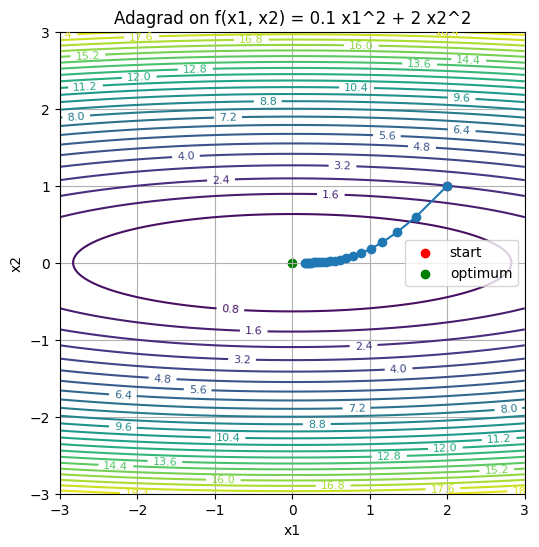

In [ ]:
def plot_trajectory(traj):
    # Vẽ contour của f
    x1 = np.linspace(-3, 3, 200)
    x2 = np.linspace(-3, 3, 200)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f(X1, X2)

    plt.figure(figsize=(6, 6))
    cs = plt.contour(X1, X2, Z, levels=30)
    plt.clabel(cs, inline=True, fontsize=8)

    # Vẽ quỹ đạo
    xs1 = [p[0] for p in traj]
    xs2 = [p[1] for p in traj]
    plt.plot(xs1, xs2, marker='o')
    plt.scatter([xs1[0]], [xs2[0]], c='red', label='start')
    plt.scatter([0], [0], c='green', label='optimum')
    plt.legend()
    plt.title("Adagrad on f(x1, x2) = 0.1 x1^2 + 2 x2^2")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

# Chạy thử
traj,loss = optimize_adagrad_2d(x1_init=2, x2_init= 1, lr=0.4, steps=20)
plot_trajectory(traj)

### Adagrad cho hàm xoay 45°
Ta xét hàm

$$
f(x_1,x_2) = 0.1(x_1 + x_2)^2 + 2(x_1 - x_2)^2
$$
và dùng Adagrad để tối ưu, với cùng cấu hình như trước:

- Khởi tạo: $x^{(0)} = (2,1)$  
- Bộ nhớ: $s^{(0)} = (0,0)$  
- Learning rate: $\eta = 0.4$

---

**1. Gradient của hàm xoay**

Đặt
$$
u = x_1 + x_2,\quad v = x_1 - x_2,
\quad f = 0.1u^2 + 2v^2.
$$

Đạo hàm riêng:

$$
\frac{\partial f}{\partial x_1}
= 0.1\cdot 2u \cdot \frac{\partial u}{\partial x_1}
  + 2\cdot 2v \cdot \frac{\partial v}{\partial x_1}
= 0.2(x_1+x_2) + 4(x_1 - x_2),
$$

$$
\frac{\partial f}{\partial x_2}
= 0.1\cdot 2u \cdot \frac{\partial u}{\partial x_2}
  + 2\cdot 2v \cdot \frac{\partial v}{\partial x_2}
= 0.2(x_1+x_2) - 4(x_1 - x_2).
$$

Nên gradient tại bước \(t\):

$$
\nabla f(x^{(t)}) =
\begin{bmatrix}
g_1^{(t)} \\
g_2^{(t)}
\end{bmatrix}
=
\begin{bmatrix}
0.2(x_1^{(t)} + x_2^{(t)}) + 4(x_1^{(t)} - x_2^{(t)}) \\
0.2(x_1^{(t)} + x_2^{(t)}) - 4(x_1^{(t)} - x_2^{(t)})
\end{bmatrix}.
$$


---

**2. Tính toán**

### Bước 0
Khởi tạo: $x^{(0)} = (2,1)$ và $s^{(0)} = (0,0)$  
Giá trị hàm:

$$
f(x^{(0)}) = 0.1(2+1)^2 + 2(2-1)^2
           = 0.1\cdot 9 + 2\cdot 1
           = 2.9
$$

Gradient tại $x^{(0)}$:

$$
g_1^{(0)} = 0.2(2+1) + 4(2-1) = 0.6 + 4 = 4.6,
$$
$$
g_2^{(0)} = 0.2(2+1) - 4(2-1) = 0.6 - 4 = -3.4.
$$

Cập nhật bộ nhớ:

$$
s_1^{(1)} = 0 + 4.6^2 = 21.16,\qquad
s_2^{(1)} = 0 + (-3.4)^2 = 11.56.
$$

Cập nhật tham số:

$$
x_1^{(1)} = 2 - 0.4\cdot\frac{4.6}{\sqrt{21.16}}
          = 2 - 0.4 = 1.6,
$$

$$
x_2^{(1)} = 1 - 0.4\cdot\frac{-3.4}{\sqrt{11.56}}
          = 1 + 0.4 = 1.4.
$$

Vậy

$$
x^{(1)} = (1.6,\; 1.4),
$$

và

$$
f(x^{(1)}) = 0.1(1.6+1.4)^2 + 2(1.6-1.4)^2
           = 0.1\cdot 3^2 + 2\cdot 0.2^2
           = 0.9 + 0.08
           = 0.98.
$$

---

### Bước 1

Gradient tại $x^{(1)} = (1.6, 1.4)$:

- $x_1^{(1)} + x_2^{(1)} = 3.0$  
- $x_1^{(1)} - x_2^{(1)} = 0.2$

$$
g_1^{(1)} = 0.2\cdot 3.0 + 4\cdot 0.2 = 0.6 + 0.8 = 1.4,
$$

$$
g_2^{(1)} = 0.2\cdot 3.0 - 4\cdot 0.2 = 0.6 - 0.8 = -0.2.
$$

Cập nhật bộ nhớ:

$$
s_1^{(2)} = 21.16 + 1.4^2 = 21.16 + 1.96 = 23.12,
$$

$$
s_2^{(2)} = 11.56 + (-0.2)^2 = 11.56 + 0.04 = 11.60.
$$

Cập nhật tham số (lấy gần đúng):

$$
x_1^{(2)}
= 1.6 - 0.4\cdot\frac{1.4}{\sqrt{23.12}}
\approx 1.48,
$$

$$
x_2^{(2)}
= 1.4 - 0.4\cdot\frac{-0.2}{\sqrt{11.60}}
\approx 1.42.
$$

Nên

$$
x^{(2)} \approx (1.48,\; 1.42),
$$

và

$$
f(x^{(2)}) \approx 0.85.
$$

---

### Bước 2

Lúc này ta đang có xấp xỉ:
$
x^{(2)} \approx (1.48,\; 1.42),\qquad
s^{(2)} = (23.12,\; 11.60).
$

**Gradient tại $x^{(2)}$:**

Ta có
$$
x_1^{(2)} + x_2^{(2)} = 1.48 + 1.42 = 2.90, \qquad
x_1^{(2)} - x_2^{(2)} = 1.48 - 1.42 = 0.06.
$$

Do đó
$$
g_1^{(2)} = 0.2\cdot 2.90 + 4\cdot 0.06
          = 0.58 + 0.24
          = 0.82,
$$
$$
g_2^{(2)} = 0.2\cdot 2.90 - 4\cdot 0.06
          = 0.58 - 0.24
          = 0.34.
$$

**Cập nhật bộ nhớ:**

$$
s_1^{(3)} = s_1^{(2)} + (g_1^{(2)})^2
          = 23.12 + 0.82^2
          = 23.12 + 0.6724
          \approx 23.79,
$$

$$
s_2^{(3)} = s_2^{(2)} + (g_2^{(2)})^2
          = 11.60 + 0.34^2
          = 11.60 + 0.1156
          \approx 11.72.
$$

**Cập nhật tham số:**

$$
x_1^{(3)}
= x_1^{(2)} - \eta \frac{g_1^{(2)}}{\sqrt{s_1^{(3)}}}
= 1.48 - 0.4 \cdot \frac{0.82}{\sqrt{23.79}}
\approx 1.41,
$$

$$
x_2^{(3)}
= x_2^{(2)} - \eta \frac{g_2^{(2)}}{\sqrt{s_2^{(3)}}}
= 1.42 - 0.4 \cdot \frac{0.34}{\sqrt{11.72}}
\approx 1.38.
$$

Nên
$$
x^{(3)} \approx (1.41,\; 1.38),
$$
và giá trị hàm tại bước này:
$$
f(x^{(3)}) = 0.1(x_1^{(3)} + x_2^{(3)})^2 + 2(x_1^{(3)} - x_2^{(3)})^2
\approx 0.78.
$$


---

### So sánh với hàm chưa xoay

- Cùng learning rate và điểm khởi tạo, giá trị hàm $f$ ở bài toán xoay cũng giảm dần:
$$
2.9 \;\to\; 0.98 \;\to\; 0.85 \;\to\; 0.79 \;\dots
$$
Nhưng **giảm chậm hơn** so với hàm gốc (chỉ còn ~0.28 sau 2 bước).  
- Lý do: sau khi xoay 45°, hướng cong “mạnh/yếu” của hàm **không còn trùng với trục $x_1,x_2$**, trong khi Adagrad chỉ điều chỉnh bước đi theo từng trục toạ độ một cách độc lập.  
→ Đây chính là ý “Adagrad không bất biến với phép quay trực giao”: behavior khác đi khá rõ so với hàm chưa xoay.


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

# Hàm mục tiêu xoay 45 độ:
# f(x1, x2) = 0.1 (x1 + x2)^2 + 2 (x1 - x2)^2
def f_rot(x1, x2):
    u = x1 + x2
    v = x1 - x2
    return 0.1 * u**2 + 2 * v**2

# Gradient của f_rot: g1 = ∂f/∂x1, g2 = ∂f/∂x2
def grad_f_rot(x1, x2):
    # từ tính toán tay:
    # ∂f/∂x1 = 0.2 (x1 + x2) + 4 (x1 - x2)
    # ∂f/∂x2 = 0.2 (x1 + x2) - 4 (x1 - x2)
    g1 = 0.2 * (x1 + x2) + 4.0 * (x1 - x2)
    g2 = 0.2 * (x1 + x2) - 4.0 * (x1 - x2)
    return g1, g2

def adagrad_step_rot(x1, x2, s1, s2, lr=0.4, eps=1e-6):
    # g_t
    g1, g2 = grad_f_rot(x1, x2)

    # s_t = s_{t-1} + g_t^2
    s1 += g1**2
    s2 += g2**2

    # x_{t+1} = x_t - lr / sqrt(s_t + eps) * g_t
    x1 -= lr / math.sqrt(s1 + eps) * g1
    x2 -= lr / math.sqrt(s2 + eps) * g2

    return x1, x2, s1, s2

def optimize_adagrad_2d_rot(x1_init, x2_init, lr=0.4, steps=50):
    x1, x2 = x1_init, x2_init
    s1, s2 = 0.0, 0.0
    path = [(x1, x2)]
    loss = [(f_rot(x1,x2))]
    for _ in range(steps):
        x1, x2, s1, s2 = adagrad_step_rot(x1, x2, s1, s2, lr=lr)
        path.append((x1, x2))
        loss.append(f_rot(x1,x2))
    return path, loss

# chạy thử
result_rot, loss_rot = optimize_adagrad_2d_rot(2, 1, lr=0.4, steps=20)

result_rot, loss_rot


([(2, 1),
  (1.6000000094517954, 1.399999982698963),
  (1.4835353576294523, 1.4234888031753414),
  (1.4161644006502923, 1.3836143231047526),
  (1.3601292531481812, 1.3337847192222365),
  (1.3082699569850613, 1.2839239370475866),
  (1.2590685494421348, 1.2358352802280772),
  (1.2121044516226884, 1.1897691358035352),
  (1.167187492889578, 1.1456767049631293),
  (1.1241847595734935, 1.1034568633857735),
  (1.0829838238255949, 1.0630055118538877),
  (1.0434839106118077, 1.0242249670197694),
  (1.0055930970921276, 0.9870251332237701),
  (0.9692269506180458, 0.9513230351925743),
  (0.9343075958528857, 0.9170420972943428),
  (0.9007629694270888, 0.884111454679921),
  (0.868526192247752, 0.8524653451725217),
  (0.8375350310274499, 0.8220425808965138),
  (0.8077314324236944, 0.7927860895776052),
  (0.7790611177765372, 0.7646425151592875),
  (0.751473228971187, 0.7375618687458174)],
 [2.9,
  0.9800000166927225,
  0.8522901245539026,
  0.7859951052955843,
  0.727105317988807,
  0.6731323757996062

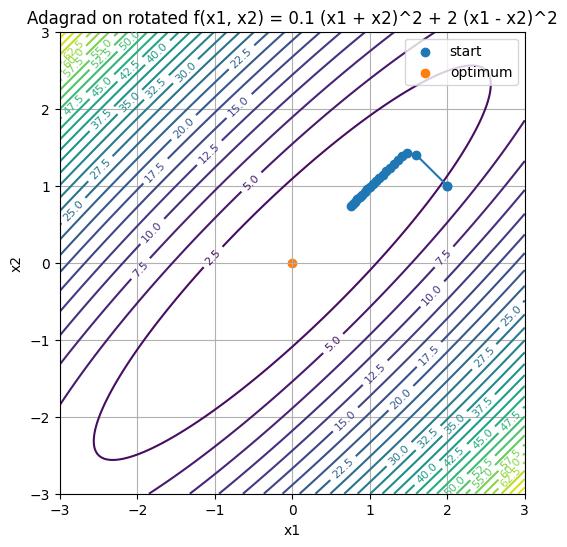

In [ ]:
def plot_trajectory_rot(traj):
    x1 = np.linspace(-3, 3, 200)
    x2 = np.linspace(-3, 3, 200)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f_rot(X1, X2)

    plt.figure(figsize=(6, 6))
    cs = plt.contour(X1, X2, Z, levels=30)
    plt.clabel(cs, inline=True, fontsize=8)

    xs1 = [p[0] for p in traj]
    xs2 = [p[1] for p in traj]
    plt.plot(xs1, xs2, marker='o')
    plt.scatter([xs1[0]], [xs2[0]], label='start')
    plt.scatter([0], [0], label='optimum')
    plt.legend()
    plt.title("Adagrad on rotated f(x1, x2) = 0.1 (x1 + x2)^2 + 2 (x1 - x2)^2")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

traj_rot,loss_rot = optimize_adagrad_2d_rot(x1_init=2, x2_init=1, lr=0.4, steps=20)
plot_trajectory_rot(traj_rot)



**Nhận xét:**
- Sau khi quan sát hình ảnh contour từ hàm gốc ta thấy các elip thẳng trục. Quỹ đạo Adagrad đi khá "mượt": từ điểm khởi tạo ban đầu nó nhanh chóng bó vào gần nghiệm (0;0) chỉ sau vài bước và việc giảm loss cũng diễn ra nhanh và ổn định.
- Đối với hàm xoay 45° contour giờ là các elip xoay chéo so với trục tọa độ. Quỹ đạo trông khác hẳn: đường đi bị "xiên" theo một hướng chéo, bước nhảy cũng nhỏ hơn hẳn và phải đi rất nhiều bước mới tiến gần được nghiệm (0;0). Tốc độ giảm của loss chậm rõ rệt so với trường hợp gốc.
---
- Như đã đề cập ở phần lý thuyết trước đó, Adgrad dùng một preconditioner chéo theo từng tọa độ. Vì vậy chỉ cho phép nó scale riêng theo từng trục $x_1$,
$x_2$ chứ không xoay hệ trục.
- Ở hàm gốc, elip thẳng hàng với trục $x_1$, $x_2$ nên việc scale riêng từng chiều trùng khá tốt với các hướng cong chính của hàm. Nói nôm na: preconditioner chéo của Adagrad gần giống “Hessian đảo” theo đúng trục nên đi rất hợp lý.
- Ở hàm xoay 45°, hướng cong mạnh – yếu lại nằm theo các vector
$(1,1)$ và $(1,−1)$, tức là không trùng với trục toạ độ. Gradient bây giờ luôn là tổ hợp của cả hai chiều. Kết quả:





## **Câu 3. Prove [Gerschgorin's circle theorem](https://en.wikipedia.org/wiki/Gershgorin_circle_theorem) which states that eigenvalues $\lambda_i$ of a matrix $\mathbf{M}$ satisfy $|\lambda_i - \mathbf{M}_{jj}| \leq \sum_{k \neq j} |\mathbf{M}_{jk}|$ for at least one choice of $j$.**



Gọi vector $\mathbf{x}_i = (\mathbf{x}_{ik})$ là vector riêng tương ứng với trị riêng $\lambda_i$. Lấy $j$ sao cho $\mathbf{x}_{ij}$ là phần tử có trị tuyệt đối lớn nhất trong $\mathbf{x}_i$. Theo định nghĩa của trị riêng, vector riêng, ta có: $\mathbf{M} \mathbf{x}_i = λ_i \mathbf{x}_i $. Xét phần tử thứ $m$ của phương trình, ta có:

$$ \sum_k{\mathbf{M}_{jk} \mathbf{x}_{ik}} = λ_i \mathbf{x}_{ij}.$$

Chuyển vế $\mathbf{M}_{jj} \mathbf{x}_{ij}$, ta được:

$$ \sum_{k \ne j}{\mathbf{M}_{jk} \mathbf{x}_{ik}} = λ_i \mathbf{x}_{ij} - \mathbf{M}_{jj} \mathbf{x}_{ij} = (\lambda_i - \mathbf{M}_{jj}) \mathbf{x}_{ij}.$$

Do đó:
$$
    |\lambda_i - \mathbf{M}_{jj}| = |\sum_{k \ne j}{\frac{\mathbf{M}_{jk} \mathbf{x}_{ik}}{\mathbf{x}_{ij}}}| \le \sum_{k \ne j}{|\mathbf{M}_{jk} \frac{\mathbf{x}_{ik}}{\mathbf{x}_{ij}}|} = \sum_{k \ne j}{|\mathbf{M}_{jk}| |\frac{\mathbf{x}_{ik}}{\mathbf{x}_{ij}}|} \le \sum_{k \neq j} |\mathbf{M}_{jk}|
$$
Dấu bé hơn hoặc bằng đúng là vì ta đã chọn $j$ sao cho $\mathbf{x}_{ij}$ có trị tuyệt đối lớn nhất, do đó $|\frac{\mathbf{x}_{ik}}{\mathbf{x}_{ij}}| \le 1$ $∀k$. Ta được điều phải chứng minh.


## **Câu 4. What does Gerschgorin's theorem tell us about the eigenvalues of the diagonally preconditioned matrix $\textrm{diag}^{-\frac{1}{2}}(\mathbf{M}) \mathbf{M} \textrm{diag}^{-\frac{1}{2}}(\mathbf{M})$?**



Gọi $ \tilde{\mathbf{M}} = \mathrm{diag}^{-\frac{1}{2}}(\mathbf{M}) \mathbf{M} \mathrm{diag}^{-\frac{1}{2}}(\mathbf{M}). $ Theo kết quả từ phần preconditioning, ta có được $ \tilde{\mathbf{M}}_{ij} = \mathbf{M}_{ij} / \sqrt{\mathbf{M}_{ii} \mathbf{M}_{jj}} $ và $\tilde{\mathbf{M}}_{ii} = 1.$ Thay vào định lý Gerchgorin, ta có được với $\lambda_i$ là các trị riêng của của $\tilde{\mathbf{M}}$, tồn tại $j$ thoả mãn:
$$ |\lambda_i - \tilde{\mathbf{M}}_{jj}| = |\lambda_i - 1| \leq \sum_{k \neq j} |\tilde{\mathbf{M}}_{jk}|
$$

Điều này có nghĩa là toàn bộ trị riêng của ma trận $\tilde{\mathbf{M}}$ đều nằm trong khoảng lân cận (đường tròn) xung quanh $1.$ Do đó, ta có thể sử dụng $1$ là giá trị ước chừng cho tất cả trị riêng của $\tilde{\mathbf{M}}$ - theo ý tưởng biến đổi không gian sao cho tất cả các trị riêng đều có giá trị bằng 1.

## **Câu 5. Try out Adagrad for a proper deep network, such as Section 7.6 when applied to Fashion-MNIST.**


Hình ảnh Architecture của Lenet trong Section 7.6

lenet.svg

lenet-vert.svg

In [ ]:
# Import các thư viện và check device trước khi training

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [ ]:
batch_size = 256

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_ds = datasets.FashionMNIST(root="data", train=True, download=True, transform=transform)

test_ds = datasets.FashionMNIST(root="data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

In [ ]:
# Tạo mạng neuron LeNet dựa trên document
class LeNet(nn.Module):
  def __init__(self):
    super().__init__()
    # Block conv + pooling

    self.features = nn.Sequential(
      # Input: [B,1,28,28]
        nn.Conv2d(1, 6, kernel_size=5, padding=2), # -> [B,6,28,28]
        nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),     # -> [B,6,14,14]
        nn.Conv2d(6,16, kernel_size=5),            # -> [B,16,10,10]
        nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),     # -> [B,16,5,5]
    )

    # Block fully-connected

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(16*5*5,120),
        nn.Sigmoid(),
        nn.Linear(120,84),
        nn.Sigmoid(),
        nn.Linear(84,10)
    )

  def forward(self, x):
    x = self.features(x)
    x = self.classifier(x)
    return x


- Dựa vào kiến trúc của LeNet ở Section 7.6 ta tạo một kiến trúc LeNet cổ điển
- Tải bộ dữ liệu Fasion-MNIST (train-test)
- Dùng DataLoader để chia batch, tự shuffle dữ liệu train


In [ ]:
import torch
from torch import nn

class Adagrad:
  def __init__(self, params, lr=0.1, eps=1e-8):
    self.params = list(params)
    self.lr = lr
    self.eps = eps
    # accumulator G_t cho từng tham số
    self.state = []
    for p in self.params:
      self.state.append(torch.zeros_like(p.data))

  @torch.no_grad()
  def step(self):
    for p, s in zip(self.params, self.state):
      if p.grad is None:
        continue
      g = p.grad

      # G_t = G_{t-1} + g_t^2
      s.add_(g * g)

      # p = p - lr / (sqrt(G) + eps) * g
      p.add_(- self.lr * g / (torch.sqrt(s) + self.eps))

  def zero_grad(self):
    for p in self.params:
      if p.grad is not None:
        p.grad.zero_()

In [ ]:
model_lenet = LeNet().to(device)
model_lenet

LeNet(
  (features): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=400, out_features=120, bias=True)
    (2): Sigmoid()
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): Sigmoid()
    (5): Linear(in_features=84, out_features=10, bias=True)
  )
)

Epoch [1/20] - Loss: 1.3644 - Acc: 48.57%
Epoch [2/20] - Loss: 0.8921 - Acc: 65.55%
Epoch [3/20] - Loss: 0.7981 - Acc: 69.81%
Epoch [4/20] - Loss: 0.7476 - Acc: 71.72%
Epoch [5/20] - Loss: 0.7122 - Acc: 72.84%
Epoch [6/20] - Loss: 0.6864 - Acc: 73.51%
Epoch [7/20] - Loss: 0.6666 - Acc: 74.08%
Epoch [8/20] - Loss: 0.6509 - Acc: 74.56%
Epoch [9/20] - Loss: 0.6385 - Acc: 74.95%
Epoch [10/20] - Loss: 0.6286 - Acc: 75.18%
Epoch [11/20] - Loss: 0.6199 - Acc: 75.60%
Epoch [12/20] - Loss: 0.6127 - Acc: 75.92%
Epoch [13/20] - Loss: 0.6058 - Acc: 76.19%
Epoch [14/20] - Loss: 0.5998 - Acc: 76.47%
Epoch [15/20] - Loss: 0.5940 - Acc: 76.72%
Epoch [16/20] - Loss: 0.5893 - Acc: 76.83%
Epoch [17/20] - Loss: 0.5843 - Acc: 77.26%
Epoch [18/20] - Loss: 0.5793 - Acc: 77.42%
Epoch [19/20] - Loss: 0.5745 - Acc: 77.69%
Epoch [20/20] - Loss: 0.5702 - Acc: 77.88%


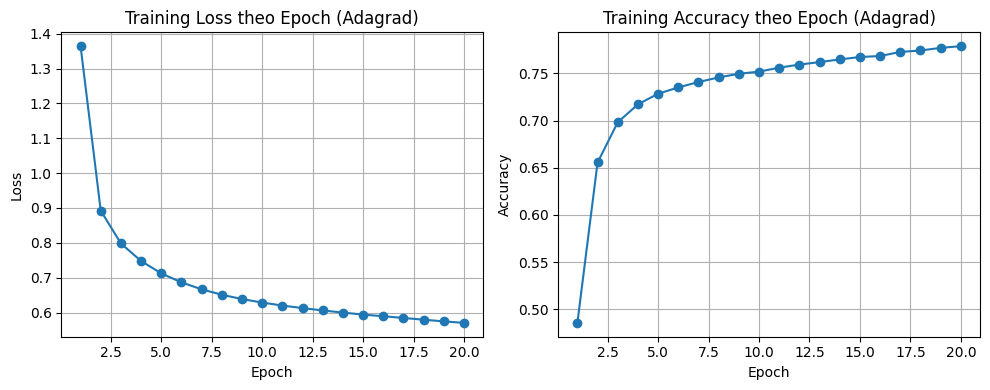

In [ ]:
import matplotlib.pyplot as plt

criterion = nn.CrossEntropyLoss()
optimizer = Adagrad(model_lenet.parameters(), lr=0.01)

num_epochs = 20

loss_history = []  # lưu loss theo từng epoch
acc_history = []   # lưu accuracy theo từng epoch

for epoch in range(num_epochs):
    model_lenet.train()  # bật chế độ train

    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # 1. Xóa gradient cũ
        optimizer.zero_grad()

        # 2. Forward
        outputs = model_lenet(images)

        # 3. Tính loss
        loss = criterion(outputs, labels)

        # 4. Backward
        loss.backward()

        # 5. Cập nhật trọng số
        optimizer.step()

        # 6. Thống kê
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total


    acc_history.append(epoch_acc)
    loss_history.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Loss: {epoch_loss:.4f} - Acc: {epoch_acc*100:.2f}%")


fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Biểu đồ Loss
axes[0].plot(range(1, num_epochs + 1), loss_history, marker='o')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss theo Epoch (Adagrad)')
axes[0].grid(True)

# Biểu đồ Accuracy
axes[1].plot(range(1, num_epochs + 1), acc_history, marker='o')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training Accuracy theo Epoch (Adagrad)')
axes[1].grid(True)

plt.tight_layout()
plt.show()


- Thực hiện training model Lenet với optimizer là Adagrad được implement ở phía trên dựa trên document, để quan sát trực quan loss giảm và accuracy tăng như thế nào sau từng epoch
- Có thể thấy với Adagrad optimizer thì loss giảm từ 1.33 xuống 0.56 sau 20 epochs, giảm đều, không bị nhảy loạn, accuracy từ 51% tăng lên 78.6%, tăng đều không bị tụt lại ở cuối
- Tuy nhiên quan sát biểu đồ cũng như log có thể thấy epoch 1 -> 3 loss rơi từ rất nhanh từ 1.33 -> 0.8, đúng với lý thuyết Adagrad: lúc dầy $G_t$ còn nhỏ nên bước nhảy hiệu dụng khá lớn, mô hình cải thiện rất nhanh.
- Về sau từ epoch 10 trở đi, loss chỉ giảm rất từ từ (0.63 -> 0.56), lý do là lúc này accumulator $G_t$ ngày càng lớn, nên learning rate hiệu dụng bị giảm mạnh, khiến bước cập nhật nhỏ lại, hội tụ chậm hơn

In [ ]:
def evaluate(model, data_loader, device):
    model.eval()  # bật chế độ eval
    correct = 0
    total = 0

    with torch.no_grad():  # không cần gradient trong lúc test
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, dim=1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = correct / total
    return acc

test_acc = evaluate(model_lenet, test_loader, device)
print(f"Test accuracy: {test_acc*100:.2f}%")

Test accuracy: 77.80%


In [ ]:
model_lenet_2 = LeNet().to(device)
model_lenet_2

LeNet(
  (features): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=400, out_features=120, bias=True)
    (2): Sigmoid()
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): Sigmoid()
    (5): Linear(in_features=84, out_features=10, bias=True)
  )
)

Epoch [1/20] - Loss: 1.2771 - Acc: 49.95%
Epoch [2/20] - Loss: 0.5395 - Acc: 79.51%
Epoch [3/20] - Loss: 0.4392 - Acc: 83.76%
Epoch [4/20] - Loss: 0.3932 - Acc: 85.39%
Epoch [5/20] - Loss: 0.3612 - Acc: 86.63%
Epoch [6/20] - Loss: 0.3394 - Acc: 87.37%
Epoch [7/20] - Loss: 0.3251 - Acc: 87.93%
Epoch [8/20] - Loss: 0.3106 - Acc: 88.43%
Epoch [9/20] - Loss: 0.2971 - Acc: 88.88%
Epoch [10/20] - Loss: 0.2870 - Acc: 89.26%
Epoch [11/20] - Loss: 0.2779 - Acc: 89.65%
Epoch [12/20] - Loss: 0.2690 - Acc: 89.96%
Epoch [13/20] - Loss: 0.2629 - Acc: 90.17%
Epoch [14/20] - Loss: 0.2531 - Acc: 90.60%
Epoch [15/20] - Loss: 0.2452 - Acc: 90.82%
Epoch [16/20] - Loss: 0.2388 - Acc: 91.07%
Epoch [17/20] - Loss: 0.2328 - Acc: 91.28%
Epoch [18/20] - Loss: 0.2253 - Acc: 91.49%
Epoch [19/20] - Loss: 0.2202 - Acc: 91.63%
Epoch [20/20] - Loss: 0.2186 - Acc: 91.77%


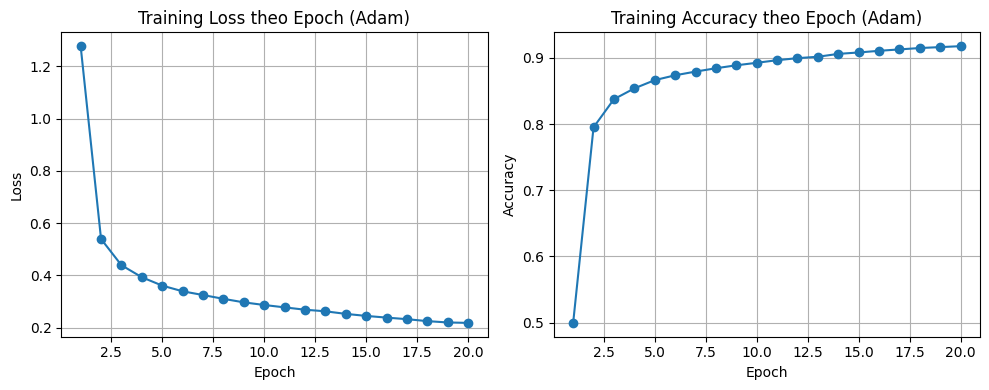

In [ ]:
import matplotlib.pyplot as plt

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_lenet_2.parameters(), lr=0.01)

num_epochs = 20

loss_history_2 = []       # lưu loss mỗi epoch
acc_history_2 = []        # (tuỳ chọn) lưu accuracy mỗi epoch

for epoch in range(num_epochs):
    model_lenet_2.train()  # bật chế độ train

    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # 1. Xóa gradient cũ
        optimizer.zero_grad()

        # 2. Forward
        outputs = model_lenet_2(images)

        # 3. Tính loss
        loss = criterion(outputs, labels)

        # 4. Backward
        loss.backward()

        # 5. Cập nhật trọng số
        optimizer.step()

        # 6. Thống kê
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total

    loss_history_2.append(epoch_loss)
    acc_history_2.append(epoch_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Loss: {epoch_loss:.4f} - Acc: {epoch_acc*100:.2f}%")


fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Biểu đồ Loss
axes[0].plot(range(1, num_epochs + 1), loss_history_2, marker='o')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss theo Epoch (Adam)')
axes[0].grid(True)

# Biểu đồ Accuracy
axes[1].plot(range(1, num_epochs + 1), acc_history_2, marker='o')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training Accuracy theo Epoch (Adam)')
axes[1].grid(True)

plt.tight_layout()
plt.show()




- Nhóm chúng em cũng chạy thử model LeNet đã được định nghĩa phía trên bằng optimizer khác là Adam trên tập dữ liệu Fashion-MNIST.
- Quan sát hình vẽ và log, đường cong loss và accuracy cho thấy hiệu quả tối ưu hóa cao hơn hẳn. Loss giảm từ khoảng 1.28 xuống 0.22 sau 20 epochs, còn accuracy tăng từ 50% lên 91.8%.
- Ngay từ những epoch đầu mô hình đã học rất nhanh, loss rơi mạnh từ 1.27 -> 0.54 trong 2 epoch đầu, sau đó tiếp tục tăng đều và chậm dần, nhưng đến cuối 20 epoch vẫn còn cải thiện nhẹ
- Sự khác biệt chính so với Adagrad nằm ở cách Adam xử lý gradient tích luỹ.  
Với Adagrad, ta cộng dồn $G_t = \sum_{\tau=1}^t g_\tau^2$, nên về sau $G_t$ trở nên rất lớn, learning rate hiệu dụng$\frac{\eta}{\sqrt{G_t}}$ bị thu nhỏ mạnh và gần như “đông cứng” mô hình sau một thời gian.

- Adam thì dùng trung bình động của cả gradient và bình phương gradient, kèm theo bias correction, nên $v_t$ không phình vô hạn như Adagrad, còn $m_t$ đóng vai trò giống momentum, giúp hướng cập nhật ổn định hơn.

→ Nhờ đó, Adam vừa có pha học rất nhanh ở đầu, vừa duy trì được bước cập nhật đủ lớn ở các epoch sau, dẫn đến loss thấp hơn và accuracy cao hơn đáng kể so với Adagrad trên cùng bài toán.

In [ ]:
def evaluate(model, data_loader, device):
    model.eval()  # bật chế độ eval
    correct = 0
    total = 0

    with torch.no_grad():  # không cần gradient trong lúc test
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, dim=1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = correct / total
    return acc

test_acc = evaluate(model_lenet_2, test_loader, device)
print(f"Test accuracy: {test_acc*100:.2f}%")

Test accuracy: 88.99%


## **Câu 6. How would you need to modify Adagrad to achieve a less aggressive decay in learning rate?**

Ta có công thức của Adagrad như sau:

$$\begin{aligned}
    \mathbf{g}_t & = \partial_{\mathbf{w}} l(y_t, f(\mathbf{x}_t, \mathbf{w})), \\
    \mathbf{s}_t & = \mathbf{s}_{t-1} + \mathbf{g}_t^2, \\
    \mathbf{w}_t & = \mathbf{w}_{t-1} - \frac{\eta}{\sqrt{\mathbf{s}_t + \epsilon}} \cdot \mathbf{g}_t.
\end{aligned}$$

Từ đây thấy được tốc độ học của Adagrad giảm với tốc độ $\mathcal{O}(t^{-\frac{1}{2}})$. Điều này có thể đúng với các bài toán lồi, nhưng sẽ không lý tưởng trong các vấn đề học sâu. Đối với những bài toán học sâu có rất nhiều bước (hàng chục nghìn tới hàng triệu bước), việc tốc độ học giảm rất nhanh đôi khi chỉ sau vài trăm bước gần như bằng 0, dẫn đến tối ưu gần như dừng lại, mô hình vẫn chưa tới tối ưu nhưng không tiến thêm được.

Vì vậy nên ta cần phải giảm tốc độ học chậm hơn nữa với các phương pháp sau:

**1. Sử dụng trung bình $\mathbf{s}_t/t$**

$$\begin{aligned}
    \mathbf{w}_t & = \mathbf{w}_{t-1} - \frac{\eta}{\sqrt{\mathbf{s}_t/t + \epsilon}} \cdot \mathbf{g}_t.
\end{aligned}$$

Ý tưởng của phương pháp này là tính trung $\mathbf{s}_t$ theo thời gian thay vì để nó tăng vô hạn. Từ đây, ta thấy tốc học độ sẽ giảm $\mathcal{O}(t^0)$ thay vì $\mathcal{O}(t^{-\frac{1}{2}})$. Tốc độ học sẽ không giảm theo thời gian vì thế nó sẽ giảm không quá mạnh như Adagrad gốc.

Nếu gradient $\mathbf{g}_t$ có phân phối ổn định (ví dụ có kỳ vọng hữu hạn), thì theo công thức luật số lớn:

$$
\frac{1}{t}\sum_{i=1}^{t} \mathbf{g}_i^2 \xrightarrow[t\to\infty]{} \mathbb{E}[\mathbf{g}^2],
$$

$\mathbf{s}_t/t$ sẽ tiến dần về độ lớn trung bình của gradient theo thời gian dẫn đến tốc độ học $\mathbf{\eta}$ ổn định, không giảm về 0 nữa.

Nhưng nhược điểm của phương pháp này là sẽ tốn rất nhiều thời gian để ổn định nếu như gradient ban đầu lớn.

**2. Sử dụng thuật toán RMSProp - một biến thể của Adagrad**

Tham khảo phần 12.8.1 trong [1], thuật toán sử dụng leaky average để tính $\mathbf{s}_{t}$ như sau:

$$\begin{aligned}
    \mathbf{s}_t = \mathbf{γ}\mathbf{s}_{t-1} + (1 - \mathbf{γ})\mathbf{g}_t^2,
\end{aligned}$$

với tham số $\mathbf{γ} > 0$

Mở rộng định nghĩa $\mathbf{s}_t$ ta được:

$$
\begin{aligned}
\mathbf{s}_t & = (1 - \gamma) \mathbf{g}_t^2 + \gamma \mathbf{s}_{t-1} \\
& = (1 - \gamma) \left(\mathbf{g}_t^2 + \gamma \mathbf{g}_{t-1}^2 + \gamma^2 \mathbf{g}_{t-2} + \ldots, \right).
\end{aligned}
$$

Từ đây, ta thấy RMSProp không tích lũy toàn bộ gradient như Adagrad. Mỗi gradient quá khứ được giảm trọng số theo $\gamma^k$. Điều này giúp RMSProp tránh phân rã tốc độ học quá mạnh như Adagrad.

In [ ]:
# Method 1: Sử dụng trung bình s_t/t
import torch
from torch import nn

class ModifiedAdagrad:
  def __init__(self, params, lr=0.1, eps=1e-8):
    self.params = list(params)
    self.lr = lr
    self.eps = eps
    # accumulator G_t và bộ đếm t
    self.state = []
    for p in self.params:
      self.state.append({
          "s": torch.zeros_like(p.data),  # G_t
          "t": 0                          # thời điểm t
      })

  @torch.no_grad()
  def step(self):
    for p, s in zip(self.params, self.state):
      if p.grad is None:
        continue
      g = p.grad

      # tăng bộ đếm t
      s["t"] += 1
      t = s["t"]

      # G_t = G_{t-1} + g_t^2
      s["s"].add_(g * g)

      # p = p - lr / (sqrt(G) + eps) * g
      p.add_(- self.lr * g / (torch.sqrt(s["s"]/t) + self.eps))

  def zero_grad(self):
    for p in self.params:
      if p.grad is not None:
        p.grad.zero_()

In [ ]:
model_lenet_3 = LeNet().to(device)
model_lenet_3

LeNet(
  (features): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=400, out_features=120, bias=True)
    (2): Sigmoid()
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): Sigmoid()
    (5): Linear(in_features=84, out_features=10, bias=True)
  )
)

Epoch [1/20] - Loss: 1.1707 - Acc: 53.08%
Epoch [2/20] - Loss: 0.6317 - Acc: 75.38%
Epoch [3/20] - Loss: 0.5024 - Acc: 80.71%
Epoch [4/20] - Loss: 0.4329 - Acc: 83.63%
Epoch [5/20] - Loss: 0.3994 - Acc: 84.91%
Epoch [6/20] - Loss: 0.3652 - Acc: 86.21%
Epoch [7/20] - Loss: 0.3458 - Acc: 86.75%
Epoch [8/20] - Loss: 0.3274 - Acc: 87.43%
Epoch [9/20] - Loss: 0.3155 - Acc: 87.92%
Epoch [10/20] - Loss: 0.3048 - Acc: 88.31%
Epoch [11/20] - Loss: 0.2947 - Acc: 88.65%
Epoch [12/20] - Loss: 0.2856 - Acc: 89.14%
Epoch [13/20] - Loss: 0.2759 - Acc: 89.38%
Epoch [14/20] - Loss: 0.2717 - Acc: 89.61%
Epoch [15/20] - Loss: 0.2615 - Acc: 89.93%
Epoch [16/20] - Loss: 0.2571 - Acc: 90.20%
Epoch [17/20] - Loss: 0.2491 - Acc: 90.41%
Epoch [18/20] - Loss: 0.2424 - Acc: 90.73%
Epoch [19/20] - Loss: 0.2376 - Acc: 90.86%
Epoch [20/20] - Loss: 0.2313 - Acc: 91.20%


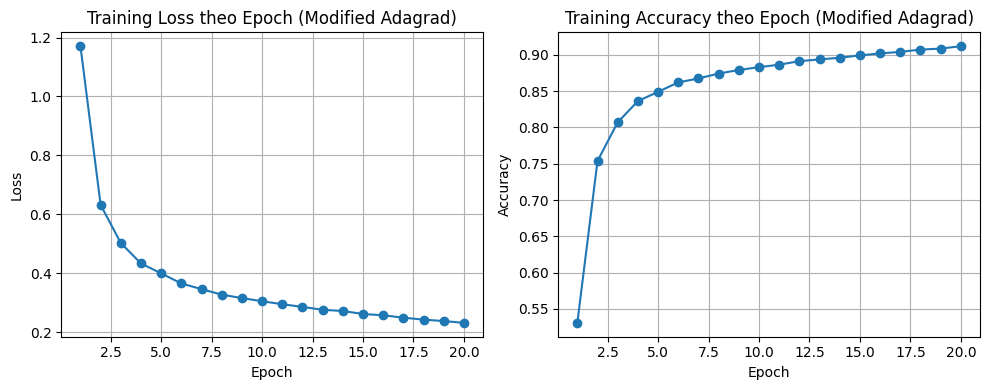

In [ ]:
import matplotlib.pyplot as plt

criterion = nn.CrossEntropyLoss()
optimizer = ModifiedAdagrad(model_lenet_3.parameters(), lr=0.01)

num_epochs = 20

loss_history = []  # lưu loss theo từng epoch
acc_history = []   # lưu accuracy theo từng epoch

for epoch in range(num_epochs):
    model_lenet_3.train()  # bật chế độ train

    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # 1. Xóa gradient cũ
        optimizer.zero_grad()

        # 2. Forward
        outputs = model_lenet_3(images)

        # 3. Tính loss
        loss = criterion(outputs, labels)

        # 4. Backward
        loss.backward()

        # 5. Cập nhật trọng số
        optimizer.step()

        # 6. Thống kê
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total


    acc_history.append(epoch_acc)
    loss_history.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Loss: {epoch_loss:.4f} - Acc: {epoch_acc*100:.2f}%")


fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Biểu đồ Loss
axes[0].plot(range(1, num_epochs + 1), loss_history, marker='o')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss theo Epoch (Modified Adagrad)')
axes[0].grid(True)

# Biểu đồ Accuracy
axes[1].plot(range(1, num_epochs + 1), acc_history, marker='o')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training Accuracy theo Epoch (Modified Adagrad)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def evaluate(model, data_loader, device):
    model.eval()  # bật chế độ eval
    correct = 0
    total = 0

    with torch.no_grad():  # không cần gradient trong lúc test
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, dim=1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = correct / total
    return acc

test_acc = evaluate(model_lenet_3, test_loader, device)
print(f"Test accuracy: {test_acc*100:.2f}%")

Test accuracy: 88.50%


In [ ]:
# Method 2: Sử dụng RMSProp
# Tạo mạng neuron LeNet dựa trên document
class ModifiedLeNet(nn.Module):
  def __init__(self):
    super().__init__()
    # Block conv + pooling

    self.features = nn.Sequential(
      # Input: [B,1,28,28]
        nn.Conv2d(1, 6, kernel_size=5, padding=2), # -> [B,6,28,28]
        nn.ReLU(),
        nn.AvgPool2d(kernel_size=2, stride=2),     # -> [B,6,14,14]
        nn.Conv2d(6,16, kernel_size=5),            # -> [B,16,10,10]
        nn.ReLU(),
        nn.AvgPool2d(kernel_size=2, stride=2),     # -> [B,16,5,5]
    )

    # Block fully-connected

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(16*5*5,120),
        nn.ReLU(),
        nn.Linear(120,84),
        nn.ReLU(),
        nn.Linear(84,10)
    )

  def forward(self, x):
    x = self.features(x)
    x = self.classifier(x)
    return x

In [ ]:
model_lenet_4 = ModifiedLeNet().to(device)
model_lenet_4

ModifiedLeNet(
  (features): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=400, out_features=120, bias=True)
    (2): ReLU()
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): ReLU()
    (5): Linear(in_features=84, out_features=10, bias=True)
  )
)

Epoch [1/20] - Loss: 2.7154 - Acc: 59.39%
Epoch [2/20] - Loss: 0.5645 - Acc: 77.96%
Epoch [3/20] - Loss: 0.4736 - Acc: 82.03%
Epoch [4/20] - Loss: 0.4042 - Acc: 84.92%
Epoch [5/20] - Loss: 0.3620 - Acc: 86.49%
Epoch [6/20] - Loss: 0.3341 - Acc: 87.44%
Epoch [7/20] - Loss: 0.3153 - Acc: 88.11%
Epoch [8/20] - Loss: 0.2975 - Acc: 88.67%
Epoch [9/20] - Loss: 0.2811 - Acc: 89.42%
Epoch [10/20] - Loss: 0.2735 - Acc: 89.65%
Epoch [11/20] - Loss: 0.2611 - Acc: 90.15%
Epoch [12/20] - Loss: 0.2557 - Acc: 90.36%
Epoch [13/20] - Loss: 0.2461 - Acc: 90.63%
Epoch [14/20] - Loss: 0.2423 - Acc: 90.87%
Epoch [15/20] - Loss: 0.2353 - Acc: 91.11%
Epoch [16/20] - Loss: 0.2311 - Acc: 91.41%
Epoch [17/20] - Loss: 0.2290 - Acc: 91.45%
Epoch [18/20] - Loss: 0.2245 - Acc: 91.58%
Epoch [19/20] - Loss: 0.2188 - Acc: 91.72%
Epoch [20/20] - Loss: 0.2134 - Acc: 91.98%


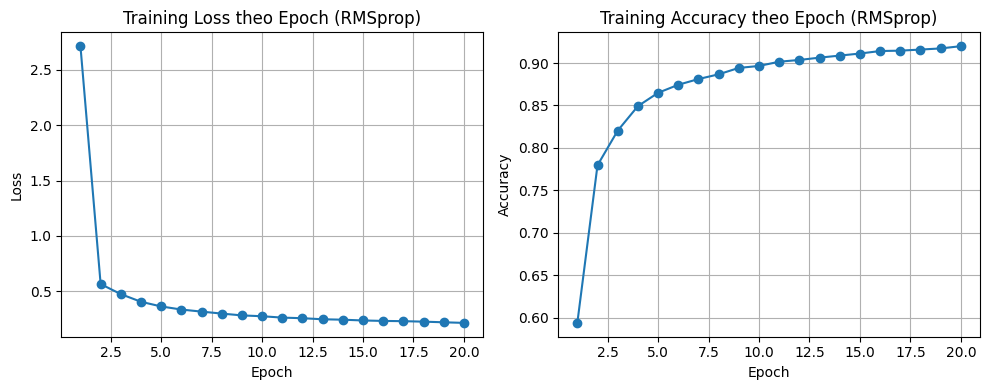

In [ ]:
import matplotlib.pyplot as plt

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model_lenet_4.parameters(), lr=0.01)

num_epochs = 20

loss_history = []  # lưu loss theo từng epoch
acc_history = []   # lưu accuracy theo từng epoch

for epoch in range(num_epochs):
    model_lenet_4.train()  # bật chế độ train

    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # 1. Xóa gradient cũ
        optimizer.zero_grad()

        # 2. Forward
        outputs = model_lenet_4(images)

        # 3. Tính loss
        loss = criterion(outputs, labels)

        # 4. Backward
        loss.backward()

        # 5. Cập nhật trọng số
        optimizer.step()

        # 6. Thống kê
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total


    acc_history.append(epoch_acc)
    loss_history.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Loss: {epoch_loss:.4f} - Acc: {epoch_acc*100:.2f}%")


fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Biểu đồ Loss
axes[0].plot(range(1, num_epochs + 1), loss_history, marker='o')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss theo Epoch (RMSprop)')
axes[0].grid(True)

# Biểu đồ Accuracy
axes[1].plot(range(1, num_epochs + 1), acc_history, marker='o')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training Accuracy theo Epoch (RMSprop)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def evaluate(model, data_loader, device):
    model.eval()  # bật chế độ eval
    correct = 0
    total = 0

    with torch.no_grad():  # không cần gradient trong lúc test
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, dim=1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = correct / total
    return acc

test_acc = evaluate(model_lenet_4, test_loader, device)
print(f"Test accuracy: {test_acc*100:.2f}%")

Test accuracy: 88.07%


# **8. Tài liệu tham khảo**

[1] Aston Zhang, Zachary C. Lipton, Mu Li, và Alexander J. Smola. *Dive into Deep Learning*. Cambridge University Press, 2023. Truy cập tại: https://D2L.ai

[2] John Duchi, Elad Hazan, và Yoram Singer. *Adaptive Subgradient Methods for Online Learning and Stochastic Optimization*. Journal of Machine Learning Research, vol. 12, 2011, pp. 2121-2159. Truy cập tại: https://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf

[3] Valentino, Nico và Setiawan, Erwin. (2024). *Movie Recommender System on Twitter Using Weighted Hybrid Filtering and GRU*. Kinetik: Game Technology, Information System, Computer Network, Computing, Electronics, and Control. 159-172. 10.22219/kinetik.v9i2.1941. Truy cập tại: https://www.researchgate.net/publication/385734477_Movie_Recommender_System_on_Twitter_Using_Weighted_Hybrid_Filtering_and_GRU

[4] M. A. Mochinski, J. Paul Barddal and F. Enembreck. *Improving Multiple Time Series Forecasting with Data Stream Mining Algorithms*. 2020 IEEE International Conference on Systems, Man, and Cybernetics (SMC), Toronto, ON, Canada, 2020, pp. 1060-1067. Truy cập tại: https://ieeexplore.ieee.org/document/9283059

[5] Hongwei Yong. *Learning Rate Re-scheduling for AdaGrad in Training Deep Neural Networks*. OpenReview, 16 Sept. 2023 (modified 11 Mar. 2024), ICLR 2024. Truy cập tại https://openreview.net/forum?id=Nh6pXEkZkK
